Importing the neccessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the CSV file which contains Covid cases in India and also state-wise until 09 September 2020.

Source - https://api.covid19india.org/documentation/csv/

In [2]:
data = pd.read_csv('states.csv')

In [3]:
data.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
6372,2020-09-09,Tripura,16736,9653,161,21,308922.0
6373,2020-09-09,India,4403574,3422441,74170,602,51804677.0
6374,2020-09-09,Uttar Pradesh,285041,216901,4112,0,6917773.0
6375,2020-09-09,Uttarakhand,26094,17473,360,77,472111.0
6376,2020-09-09,West Bengal,186956,160025,3677,0,2243294.0


In [4]:
data.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
0,2020-01-30,Kerala,1,0,0,0,NaN
1,2020-01-30,India,1,0,0,0,NaN
2,2020-02-02,Kerala,2,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
4,2020-02-03,Kerala,3,0,0,0,NaN


In [5]:
data.State.value_counts()

India                                       196
Kerala                                      196
Delhi                                       192
Telangana                                   192
Rajasthan                                   191
Haryana                                     190
Uttar Pradesh                               190
Ladakh                                      187
Tamil Nadu                                  187
Karnataka                                   185
Jammu and Kashmir                           185
Maharashtra                                 185
Punjab                                      185
Andhra Pradesh                              182
Himachal Pradesh                            180
Uttarakhand                                 179
Odisha                                      178
West Bengal                                 177
Puducherry                                  177
Gujarat                                     175
Chhattisgarh                            

In [6]:
d1 = data.groupby('State')

In [7]:
df = d1.describe()

In [8]:
df.index

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'India', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'State Unassigned',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal'],
      dtype='object', name='State')

In [9]:
Total_Confirmed = df.Confirmed['max']

In [10]:
Total_Recovered = df.Recovered['max']
Total_Recovered = Total_Recovered[Total_Recovered.index != 'India']

In [11]:
Total_Confirmed = Total_Confirmed[Total_Confirmed.index != 'India']

State-wise Total Confirmed cases

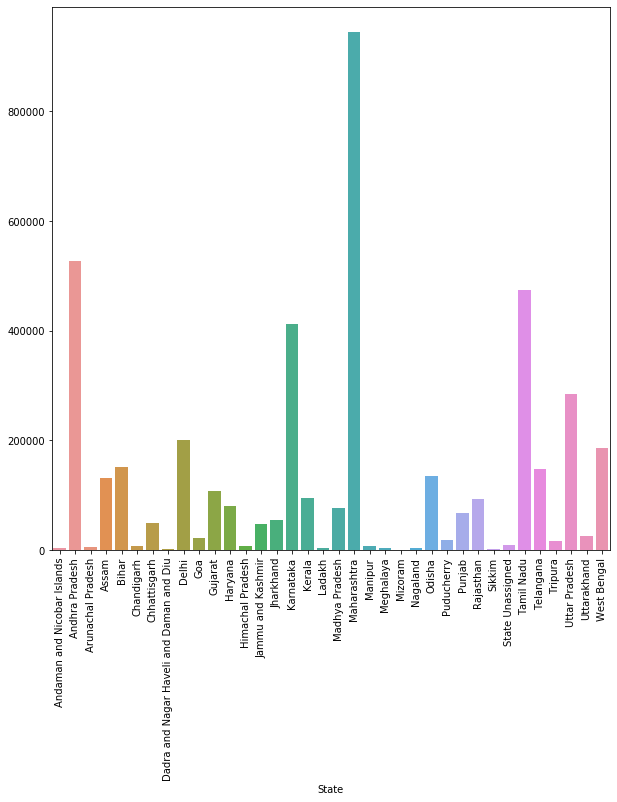

In [12]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x=Total_Confirmed.index,y=Total_Confirmed.values)

State-wise Total Recovered cases

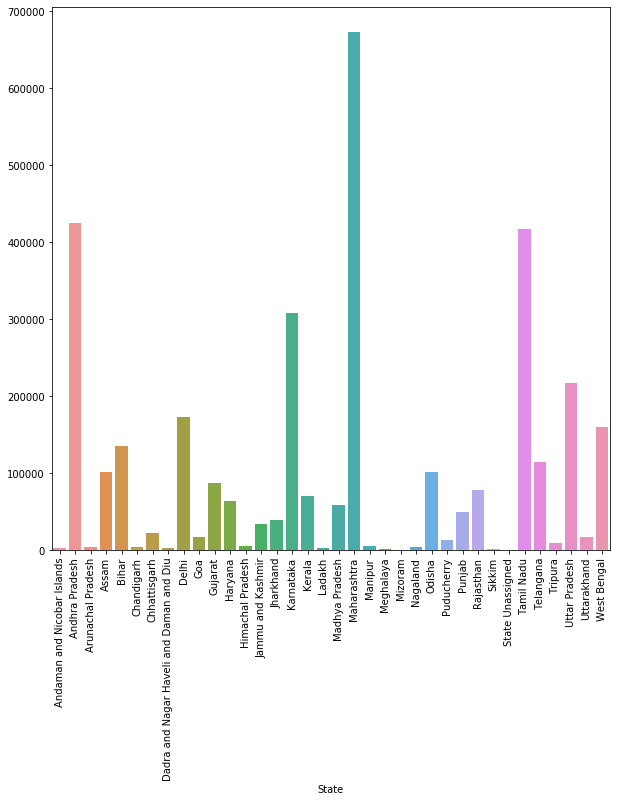

In [13]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x=Total_Recovered.index,y=Total_Recovered.values)

State-wise Total Deceased cases

In [14]:
Total_Deceased = df.Deceased['max']
Total_Deceased = Total_Deceased[Total_Deceased.index != 'India']

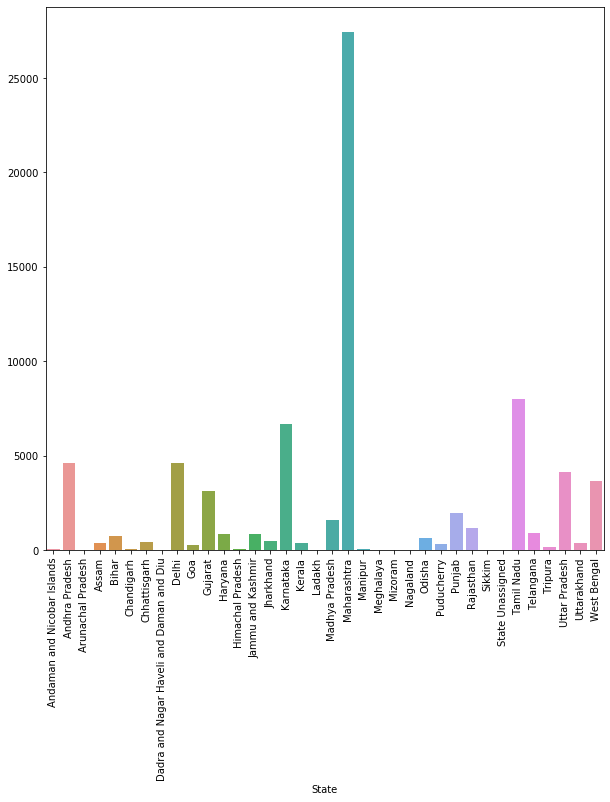

In [15]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
sns.barplot(x=Total_Deceased.index,y=Total_Deceased.values)

For creating a RNN, we are using only the Confirmed cases in India as a whole 
from 30th Jan 2020 to 31st July 2020 as train dataset 

From 01 August 2020 to 31st of August 2020 as the test data.

Later we compare the predicted cases by the RNN model to the actual cases in August.

In [16]:
df1 = data[data['State']=='India']

In [17]:
df1.head()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
1,2020-01-30,India,1,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
11,2020-03-02,India,5,3,0,0,NaN


In [18]:
df1.shape

(196, 7)

In [19]:
df1.head(20)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
1,2020-01-30,India,1,0,0,0,NaN
3,2020-02-02,India,2,0,0,0,NaN
5,2020-02-03,India,3,0,0,0,NaN
7,2020-02-14,India,3,3,0,0,NaN
11,2020-03-02,India,5,3,0,0,NaN
16,2020-03-03,India,6,3,0,0,NaN
22,2020-03-04,India,28,3,0,0,NaN
29,2020-03-05,India,30,3,0,0,NaN
36,2020-03-06,India,31,3,0,0,NaN
45,2020-03-07,India,34,3,0,0,NaN


In [20]:
df1.describe()

,Confirmed,Recovered,Deceased,Other,Tested
count,1.960000e+02,1.960000e+02,196.000000,196.000000,1.810000e+02
mean,8.520821e+05,5.961248e+05,17730.540816,164.270408,1.142488e+07
std,1.205656e+06,9.154868e+05,21885.788313,223.500917,1.403276e+07
min,1.000000e+00,0.000000e+00,0.000000,0.000000,6.500000e+03
25%,1.316675e+04,1.702500e+03,442.500000,3.000000,7.167330e+05
50%,2.217955e+05,1.062590e+05,6224.000000,13.500000,5.363445e+06
75%,1.251782e+06,7.924975e+05,30078.750000,404.250000,1.680680e+07
max,4.403574e+06,3.422441e+06,74170.000000,623.000000,5.180468e+07


In [21]:
df1.isnull().sum()

Date          0
State         0
Confirmed     0
Recovered     0
Deceased      0
Other         0
Tested       15
dtype: int64

There are null values in the Tested column. As we are considering only the Confirmed cases, we are not treating the null values in the Tested column of our dataset.

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 6373
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       196 non-null    object 
 1   State      196 non-null    object 
 2   Confirmed  196 non-null    int64  
 3   Recovered  196 non-null    int64  
 4   Deceased   196 non-null    int64  
 5   Other      196 non-null    int64  
 6   Tested     181 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 12.2+ KB


In [23]:
df1.tail(41)

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
4933,2020-07-31,India,1697054,1095545,36554,425,19358659.0
4969,2020-08-01,India,1752171,1146913,37408,431,19821831.0
5005,2020-08-02,India,1804843,1187268,38168,433,20202858.0
5041,2020-08-03,India,1855332,1230338,38974,437,20864750.0
5077,2020-08-04,India,1906614,1281558,39823,449,21484402.0
5113,2020-08-05,India,1963240,1327141,40742,450,22149351.0
5149,2020-08-06,India,2025410,1377282,41641,454,22788393.0
5185,2020-08-07,India,2086865,1427669,42577,456,23387171.0
5221,2020-08-08,India,2152021,1479804,43452,461,24106535.0
5257,2020-08-09,India,2214138,1534278,44465,464,24583558.0


In [24]:
df_test = df1.loc[4969:6049,:]
df_test

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
4969,2020-08-01,India,1752171,1146913,37408,431,19821831.0
5005,2020-08-02,India,1804843,1187268,38168,433,20202858.0
5041,2020-08-03,India,1855332,1230338,38974,437,20864750.0
5077,2020-08-04,India,1906614,1281558,39823,449,21484402.0
5113,2020-08-05,India,1963240,1327141,40742,450,22149351.0
5149,2020-08-06,India,2025410,1377282,41641,454,22788393.0
5185,2020-08-07,India,2086865,1427669,42577,456,23387171.0
5221,2020-08-08,India,2152021,1479804,43452,461,24106535.0
5257,2020-08-09,India,2214138,1534278,44465,464,24583558.0
5293,2020-08-10,India,2267154,1581640,45352,467,25281848.0


In [25]:
df_train = df1.loc[:4933,:]

In [26]:
df_train.tail()

,Date,State,Confirmed,Recovered,Deceased,Other,Tested
4789,2020-07-27,India,1482490,952997,33457,410,17334885.0
4825,2020-07-28,India,1532121,988680,34231,411,17743740.0
4861,2020-07-29,India,1584600,1021566,35006,415,18190382.0
4897,2020-07-30,India,1639568,1058991,35790,422,18832970.0
4933,2020-07-31,India,1697054,1095545,36554,425,19358659.0


In [27]:
training_set = df_train[['Confirmed']].values

In [28]:
real_covid_cases = df_test['Confirmed'].values

Feature Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [30]:
df_train.shape

(156, 7)

Creating a data structure with 90 timesteps and 1 output

In [31]:
X_train = []
y_train = []
for i in range(90, 156):
    X_train.append(training_set_scaled[i-90:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [32]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
import tensorflow as tf

Initializing the RNN

In [34]:
regressor = tf.keras.models.Sequential()

Adding the First LSTN layer and 20% dropout 

In [35]:
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

Adding the Second LSTN layer and 20% dropout 

In [36]:
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

Adding the Third LSTN layer and 20% dropout 

In [37]:
regressor.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(tf.keras.layers.Dropout(0.2))

Adding the Last and final LSTN layer and 20% dropout 

In [38]:
regressor.add(tf.keras.layers.LSTM(units = 50))
regressor.add(tf.keras.layers.Dropout(0.2))

Adding the Output Layer

In [39]:
regressor.add(tf.keras.layers.Dense(units = 1))

Compiling the RNN 

In [40]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Fitting the RNN on the training dataset

In [41]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 30)

Epoch 1/100
3/3 [==============================] - 1s 179ms/step - loss: 0.2155
Epoch 2/100
3/3 [==============================] - 0s 164ms/step - loss: 0.1220
Epoch 3/100
3/3 [==============================] - 0s 128ms/step - loss: 0.0304
Epoch 4/100
3/3 [==============================] - 0s 120ms/step - loss: 0.0269
Epoch 5/100
3/3 [==============================] - 0s 132ms/step - loss: 0.0191
Epoch 6/100
3/3 [==============================] - 0s 124ms/step - loss: 0.0326
Epoch 7/100
3/3 [==============================] - 0s 128ms/step - loss: 0.0145
Epoch 8/100
3/3 [==============================] - 0s 122ms/step - loss: 0.0108
Epoch 9/100
3/3 [==============================] - 0s 121ms/step - loss: 0.0106
Epoch 10/100
3/3 [==============================] - 0s 130ms/step - loss: 0.0032
Epoch 11/100
3/3 [==============================] - 0s 138ms/step - loss: 0.0150
Epoch 12/100
3/3 [==============================] - 0s 121ms/step - loss: 0.0038
Epoch 13/100
3/3 [===================

In [42]:
test = df_test['Confirmed'].values

Getting the predicted covid cases for the month of August

In [43]:
dataset_total = pd.concat((df_train['Confirmed'], df_test['Confirmed']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(df_test) - 90:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(90, 90+len(df_test)):
    X_test.append(inputs[i-90:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

Visualising the results

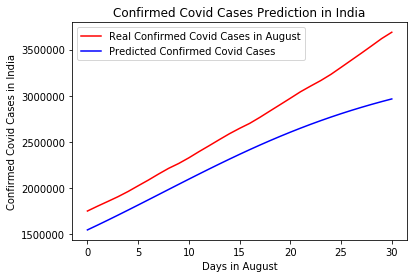

In [45]:
plt.plot(real_covid_cases, color = 'red', label = 'Real Confirmed Covid Cases in August')
plt.plot(predicted, color = 'blue', label = 'Predicted Confirmed Covid Cases')
plt.title('Confirmed Covid Cases Prediction in India')
plt.xlabel('Days in August')
plt.ylabel('Confirmed Covid Cases in India')
plt.legend()
plt.show()